In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import openpyxl
import re

- KOSDAQ 5개년 ROE 지수 확인

In [2]:
df = pd.read_excel("../data/KOSDAQROE5years.xlsx")
df.head()

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
1,아이패밀리에스씨,-20.3,17.7,NaN,84.8,23.0
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5
3,오스템임플란트,9.3,11.5,-17.2,78.8,44.4
4,휴림로봇,9.2,-76.0,-34.7,78.8,-72.0


In [3]:
df.isna().sum()

종목명      0
2017    33
2018    23
2019    11
2020     2
2021     3
dtype: int64

In [4]:
df.replace('', np.nan)
df.head(3)

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
1,아이패밀리에스씨,-20.3,17.7,NaN,84.8,23.0
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5


In [7]:
df.dropna(inplace=True)
df.head(3)

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5
3,오스템임플란트,9.3,11.5,-17.2,78.8,44.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 226
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     176 non-null    object 
 1   2017    176 non-null    float64
 2   2018    176 non-null    float64
 3   2019    176 non-null    float64
 4   2020    176 non-null    float64
 5   2021    176 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.6+ KB


In [9]:
# ROE 11이상 
df_ROE_11_upper = df[(df[2017] >= 11) & (df[2018] >= 11) & (df[2019] >= 11) & (df[2020] >= 11) & (df[2021] >= 11)]
df_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021
21,디알젬,31.7,21.0,17.9,47.0,20.7
25,노바텍,31.7,29.2,16.4,44.1,44.6
32,고려신용정보,21.1,25.6,31.8,39.8,32.3
41,에이치피오,19.4,23.9,24.7,35.6,16.5
51,에이피티씨,60.8,45.2,25.1,31.3,51.1


In [10]:
# '평균' 열 추가
df_ROE_11_upper["average"] = df_ROE_11_upper.mean(axis=1)
df_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021,average
21,디알젬,31.7,21.0,17.9,47.0,20.7,27.66
25,노바텍,31.7,29.2,16.4,44.1,44.6,33.20
32,고려신용정보,21.1,25.6,31.8,39.8,32.3,30.12
41,에이치피오,19.4,23.9,24.7,35.6,16.5,24.02
51,에이피티씨,60.8,45.2,25.1,31.3,51.1,42.70


- 한글깨짐방지

In [13]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list[:5]

['STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode']

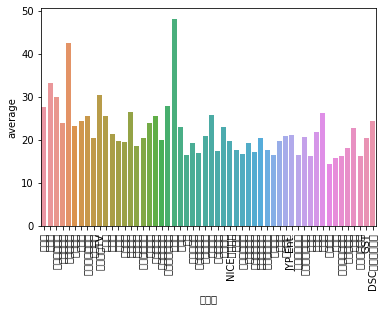

In [14]:
sns.barplot(
    data = df_ROE_11_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90)
plt.show()